In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone


In [12]:
dataset = pd.read_csv('HomeC-meter1_2015.csv')

In [13]:
dataset.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,2015-01-01 00:00:00,1.167223,0.0,1.167223,0.000236,0.229379,0.331326,0.018590,0.067467,0.004420,0.009904,0.000437,0.000060,0.000007,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 00:30:00,1.171444,0.0,1.171444,0.000225,0.228758,0.300048,0.018604,0.108881,0.004456,0.010001,0.000347,0.000087,0.000007,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,1.151474,0.0,1.151474,0.000229,0.229446,0.323099,0.018620,0.005851,0.004449,0.009916,0.000612,0.000031,0.000007,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 01:30:00,1.398982,0.0,1.398982,0.000209,0.277066,0.314399,0.018593,0.005925,0.004457,0.009872,0.000693,0.000004,0.000007,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 02:00:00,1.080775,0.0,1.080775,0.000239,0.228736,0.308560,0.018638,0.062217,0.004478,0.010046,0.000497,0.000032,0.000006,0.0,0.0,0.0,0.0,0.0


In [14]:
dataset.tail()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
39759,2015-12-31 23:55:00,1.136050,0.003467,1.136050,0.000017,0.021117,0.224267,0.441600,0.126483,0.007083,0.013217,0.000417,0.000100,0.000000,0.031483,0.001050,0.004050,0.001517,0.003467
39760,2015-12-31 23:56:00,0.949633,0.003483,0.949633,0.000033,0.020817,0.063117,0.444967,0.126000,0.006967,0.013117,0.000417,0.000167,0.000017,0.031417,0.001000,0.004050,0.001550,0.003483
39761,2015-12-31 23:57:00,0.944700,0.003467,0.944700,0.000017,0.020783,0.062550,0.445350,0.125467,0.006950,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004050,0.001633,0.003467
39762,2015-12-31 23:58:00,0.945417,0.003483,0.945417,0.000017,0.020783,0.061850,0.450667,0.125050,0.007033,0.013100,0.000417,0.000150,0.000000,0.031467,0.001000,0.004033,0.001583,0.003483
39763,2015-12-31 23:59:00,0.936550,0.003467,0.936550,0.000000,0.020717,0.062800,0.442717,0.124633,0.006950,0.013117,0.000433,0.000133,0.000000,0.031533,0.001000,0.004050,0.001633,0.003467


In [15]:
dataset.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'House overall [kW]',
       'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]'],
      dtype='object')

In [16]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar'],
      dtype='object')

In [17]:
dataset.describe()

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar
count,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000
mean,0.893137,0.045883,0.893137,0.038868,0.118660,0.154126,0.082780,0.056743,0.025174,0.013910,0.001548,0.009786,0.000008,0.075229,0.015604,0.011691,0.039420,0.045883
std,0.737002,0.099776,0.737002,0.199305,0.170315,0.180630,0.096339,0.065954,0.042349,0.009516,0.019522,0.075930,0.000009,0.236358,0.117577,0.094075,0.095368,0.099776
min,0.000133,0.000000,0.000133,0.000000,0.000067,0.000217,0.000133,0.000017,0.000000,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431470,0.003000,0.431470,0.000006,0.020250,0.063540,0.040210,0.005117,0.004484,0.012570,0.000500,0.000029,0.000000,0.029583,0.000997,0.004000,0.001454,0.003000
50%,0.708066,0.003367,0.708066,0.000030,0.020700,0.065864,0.042333,0.017279,0.007333,0.012900,0.000667,0.000067,0.000004,0.031500,0.001000,0.004003,0.001567,0.003367
75%,1.132841,0.019825,1.132841,0.000217,0.153071,0.126712,0.080521,0.119886,0.008267,0.013083,0.000733,0.000217,0.000017,0.038300,0.001017,0.004167,0.001667,0.019825
max,9.890377,1.043312,9.890377,1.370083,1.843700,0.769954,0.870517,0.631167,1.226867,0.275139,0.878183,1.607650,0.000067,6.279317,1.615567,1.873533,0.372333,1.043312


In [18]:
dataset.shape

(39764, 19)

In [19]:
#Checking null values
dataset.isnull().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [20]:
dataset.isna().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [21]:
# Check if there are entries with null values
display(dataset.info())
dataset[dataset.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39764 entries, 0 to 39763
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date & Time    39764 non-null  object 
 1   use            39764 non-null  float64
 2   gen            39764 non-null  float64
 3   House overall  39764 non-null  float64
 4   Dishwasher     39764 non-null  float64
 5   Furnace 1      39764 non-null  float64
 6   Furnace 2      39764 non-null  float64
 7   Home office    39764 non-null  float64
 8   Fridge         39764 non-null  float64
 9   Wine cellar    39764 non-null  float64
 10  Garage door    39764 non-null  float64
 11  Kitchen 12     39764 non-null  float64
 12  Kitchen 14     39764 non-null  float64
 13  Kitchen 38     39764 non-null  float64
 14  Barn           39764 non-null  float64
 15  Well           39764 non-null  float64
 16  Microwave      39764 non-null  float64
 17  Living room    39764 non-null  float64
 18  Solar 

None

,Date & Time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar


In [22]:
dataset['Date & Time'].head()

0    2015-01-01 00:00:00
1    2015-01-01 00:30:00
2    2015-01-01 01:00:00
3    2015-01-01 01:30:00
4    2015-01-01 02:00:00
Name: Date & Time, dtype: object

In [23]:
dataset.shape

(39764, 19)

<AxesSubplot:>

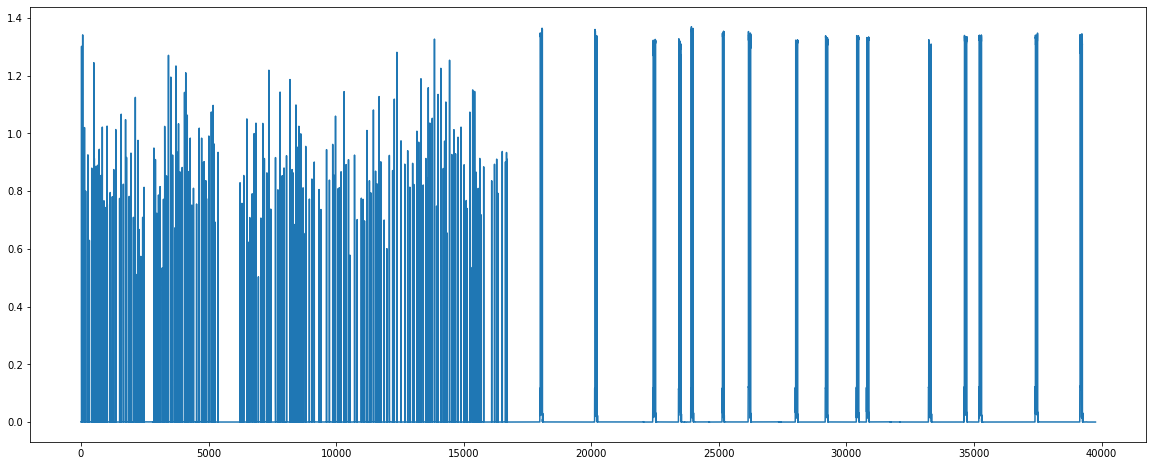

In [24]:
dataset['Dishwasher'].plot(figsize=(20,8))

In [25]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['sum_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [26]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [27]:
dataset.shape

(39764, 16)

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

In [29]:
# Convert the 'Datetime' column to a datetime object and set it as the index
dataset['Date & Time'] = pd.to_datetime(dataset['Date & Time'])
dataset.set_index(['Date & Time'], inplace=True)


KeyError: ignored

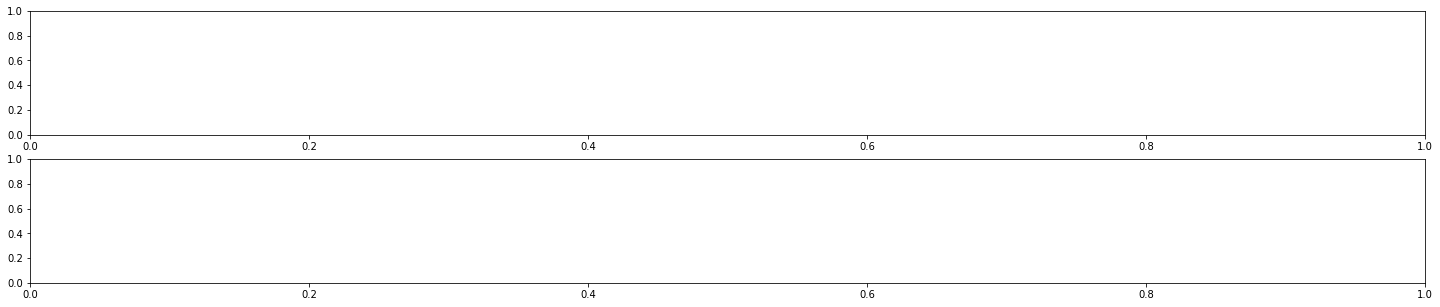

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use'].resample('D').mean().plot(ax=axes[0])
dataset['gen'].resample('D').mean().plot(ax=axes[1])

In [32]:
dataset['Barn'].value_counts()

0.000000    3724
0.031283     178
0.031317     177
0.031017     169
0.031050     168
            ... 
0.031584       1
0.031934       1
0.032023       1
0.031804       1
0.155067       1
Name: Barn, Length: 15404, dtype: int64

<AxesSubplot:xlabel='Date & Time'>

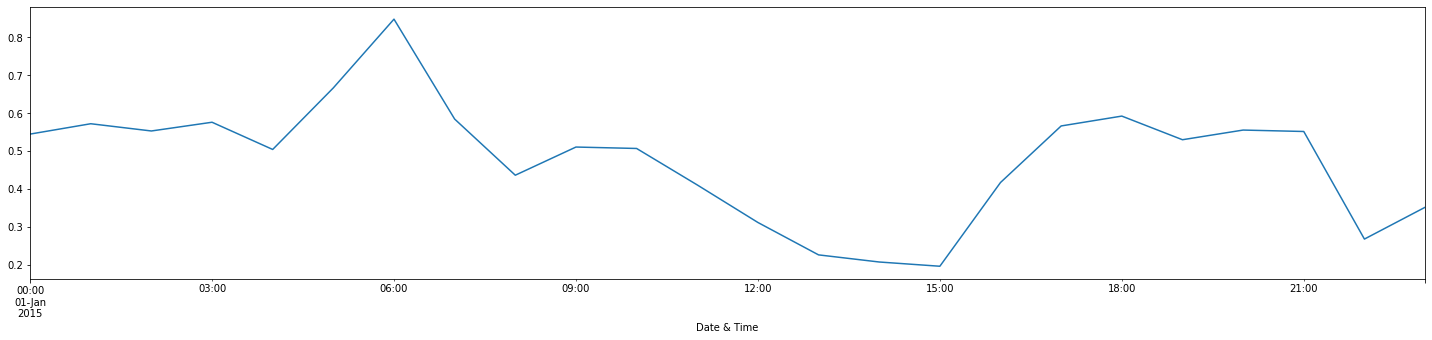

In [33]:
dataset['sum_Furnace'].resample("h").mean().iloc[:24].plot()

In [34]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [35]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [36]:
dataset.columns


Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [38]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -1.285377e+01
p-value                        5.284773e-24
No Lags Used                   5.400000e+01
Number of Observations Used    3.970900e+04
Critical Value (1%)           -3.430515e+00
Critical Value (5%)           -2.861613e+00
Critical Value (10%)          -2.566809e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.947922e+00
p-value                        3.182905e-12
No Lags Used                   5.400000e+01
Number of Observations Used    3.970900e+04
Critical Value (1%)           -3.430515e+00
Critical Value (5%)           -2.861613e+00
Critical Value (10%)          -2.566809e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -1.285377e+01
p-value                        5

KeyboardInterrupt: ignored

In [ ]:
X = dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load data
# data = pd.read_csv('data.csv', index_col='Time', parse_dates=['Time'])

# Differencing
dataset['living_room_diff'] = dataset['Living room'].diff()
dataset['solar_diff'] = dataset['Solar'].diff()

# # Drop NaN values
# data.dropna(inplace=True)
# Replace NaN and Inf values with 0
dataset = dataset.replace([np.inf, -np.inf, np.nan], 0)

# Augmented Dickey-Fuller test
result_living_room = adfuller(dataset['living_room_diff'])
result_solar = adfuller(dataset['solar_diff'])

print('Living room:')
print(f'ADF Statistic: {result_living_room[0]}')
print(f'p-value: {result_living_room[1]}')
print(f'Critical Values: {result_living_room[4]}')
if result_living_room[0] < result_living_room[4]['5%']:
    print('Stationary')
else:
    print('Non-Stationary')

print('Solar:')
print(f'ADF Statistic: {result_solar[0]}')
print(f'p-value: {result_solar[1]}')
print(f'Critical Values: {result_solar[4]}')
if result_solar[0] < result_solar[4]['5%']:
    print('Stationary')
else:
    print('Non-Stationary')

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
!pip install pmdarima

from pmdarima import auto_arima



In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Loop through each column in the dataset
for col in dataset.columns:
    # Create a new figure
    fig = plt.figure(figsize=(12,7))
    
    # Add subplots for the ACF and PACF
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dataset[col].values.squeeze(), lags=10, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dataset[col], lags=10, ax=ax2)
    
    # Set the title to the column name
    fig.suptitle(col)
    
    # Show the plot
    plt.show()

In [ ]:
# Resample each column of the dataset and calculate rolling mean and standard deviation
rolling_window = 10
data_daily = dataset.resample('d').mean()
rolling_mean = data_daily.rolling(window=rolling_window).mean()
rolling_std = data_daily.rolling(window=rolling_window).std()

# Plot the results for each column
fig, axs = plt.subplots(len(dataset.columns), 2, figsize=(16, 6*len(dataset.columns)))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(dataset.columns):
    axs[i, 0].plot(data_daily[col], c='blue', label=f'Data - {col}')
    axs[i, 0].plot(rolling_mean[col], c='red', label=f'Rolling mean ({rolling_window} days)')
    axs[i, 0].legend(fontsize=12)
    axs[i, 0].set_ylabel('kW')
    axs[i, 0].margins(x=0)
    axs[i, 0].grid()
    
    axs[i, 1].plot(rolling_std[col], c='black', label=f'Rolling Std ({rolling_window} days)')
    axs[i, 1].legend(fontsize=12)
    axs[i, 1].set_ylabel('kW')
    axs[i, 1].margins(x=0)
    axs[i, 1].grid()
    
plt.show()


In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
dataset.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

In [ ]:
X = dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

In [ ]:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller, grangercausalitytests
import statsmodels.tsa.vector_ar.vecm as vecm
from statsmodels.tsa.api import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.decomposition import PCA


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# create a sample time series with daily data
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data_daily = pd.Series(np.random.randn(len(dates)), index=dates)

# decompose the data using seasonal_decompose
result = seasonal_decompose(data_daily, model='additive')

# plot the decomposition using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


In [ ]:
# create a sample DataFrame with daily data for 3 columns
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data_daily = pd.DataFrame(np.random.randn(len(dates), 15), index=dates, 
                          columns=['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',                                    'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',                                    'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'])

# select the columns to decompose
cols = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge','Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',         'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# loop through each selected column and decompose it using seasonal_decompose
for col in cols:
    result = seasonal_decompose(data_daily[col], model='additive')

    # plot the decomposition using matplotlib
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed')
    result.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend')
    result.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal')
    result.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual')
    plt.tight_layout()
    plt.show()


In [ ]:
pdq = []
for name, column in train_diff[[ 'use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'   ]].iteritems():
    print(f'Searching order of p,d and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=5, max_q=5, max_D=1, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pdq.append(stepwise_model.get_params().get('order'))


In [ ]:
pdq

In [ ]:
pdq = []
for name, column in train_diff[[ 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]].iteritems():
    print(f'Searching order of p,d and q for : {name}')
    stepwise_model = auto_arima(train_diff[name], start_p=1, start_q=1, max_p=5, max_q=5, max_P=2, max_Q=2, seasonal=True, m=12, 
                                trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    seasonal_parameter = stepwise_model.get_params().get('seasonal_order')
    print(f'optimal order for:{name} is: {parameter} \n')
    print(f'optimal seasonal order for:{name} is: {seasonal_parameter} \n\n')
    pdq.append(stepwise_model.get_params().get('order'))

In [ ]:
pdq[]

In [ ]:
# Define the (P, D, Q) orders for each variable
orders = {

    'use': (1, 0, 1),
     'gen': (1, 0, 1),
    'House overall': (1, 0, 1),
    'Dishwasher': (1, 0, 2),
    'Home office': (0, 0, 5),
    'Fridge': (0, 0, 1),
    'Wine cellar': (0, 0, 1),
    'Garage door': (3, 0, 1),
    'Barn': (0, 0, 5),
    'Well': (2, 0, 2),
    'Microwave': (5, 0, 0),
    'Living room': (0, 0, 2),
    'Solar': (1, 0, 1),
    'sum_Furnace': (2, 0, 3),
    'sum_Kitchen': (1, 0, 3)

   
}

# Generate synthetic data for one million households
num_households = 2
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2015-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
synthetic_data = pd.DataFrame(index=date_range)

for name in orders:
    print(f'Generating synthetic data for variable: {name}')
    p, d, q = orders[name]
    stepwise_model = auto_arima(train_diff[name],order=(p, d, q))
    arima_model_fit = stepwise_model.fit(train_diff[name])
    for i in range(num_households):
        synthetic_data[f'{name}_household_{i+1}'] = arima_model_fit.predict(start=0, end=len(date_range)-1)



In [ ]:
synthetic_data.to_csv('synthetic_data.csv')

In [ ]:
# Define the (P, D, Q) orders for each variable
orders = {
    'use': (1, 0, 1),
     'gen': (1, 0, 1),
    'House overall': (1, 0, 1),
    'Dishwasher': (1, 0, 2),
    'Home office': (0, 0, 5),
    'Fridge': (0, 0, 1),
    'Wine cellar': (0, 0, 1),
    'Garage door': (3, 0, 1),
    'Barn': (0, 0, 5),
    'Well': (2, 0, 2),
    'Microwave': (5, 0, 0),
    'Living room': (0, 0, 2),
    'Solar': (1, 0, 1),
    'sum_Furnace': (2, 0, 3),
    'sum_Kitchen': (1, 0, 3)
}

# Generate synthetic data for one million households
num_households = 2
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2015-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
synthetic_data = pd.DataFrame(index=date_range)

for name in orders:
    print(f'Generating synthetic data for variable: {name}')
    p, d, q = orders[name]
    stepwise_model = auto_arima(train_diff[name],order=(p, d, q))
    arima_model_fit =stepwise_model.fit (train_diff[name]
    for i in range(num_households):
        synthetic_data[f'{name}_household_{i+1}'] = arima_model_fit.predict(start=0, end=len(date_range)-1)



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# Choose the columns to generate synthetic data
columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# Set the ARIMA model parameters
p = 0
d = 1
q = 0

# Define the number of rows to generate
num_rows = 40000

# Generate synthetic data using the ARIMA model
synthetic_data = np.empty((num_rows, len(columns)))
for i, column in enumerate(columns):
    data = dataset[column].values
    arima = sm.tsa.ARIMA(data, order=(p, d, q))
    arima_fit = arima.fit()
    synthetic_data[:, i] = arima_fit.simulate(nsimulations=num_rows)

# Save the synthetic data to a CSV file
pd.DataFrame(synthetic_data, columns=columns).to_csv('synthetic.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


# Choose the columns to generate synthetic data
columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# Set the ARIMA model parameters
p = 0
d = 1
q = 0

# Generate synthetic data using the ARIMA model
synthetic_data = np.empty((len(dataset), len(columns)))
for i, column in enumerate(columns):
    data = dataset[column].values
    arima = sm.tsa.ARIMA(data, order=(p, d, q))
    arima_fit = arima.fit()
    synthetic_data[:, i] = arima_fit.simulate(nsimulations=len(dataset))

# Normalize the synthetic data
scaler = MinMaxScaler()
synthetic_data_norm = scaler.fit_transform(synthetic_data)

# Save the normalized synthetic data to a CSV file
pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm 1.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


# Choose the columns to generate synthetic data
columns = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# Set the ARIMA model parameters
p = 1
d = 0
q = 1

# Generate synthetic data using the ARIMA model
synthetic_data = np.empty((len(dataset), len(columns)))
for i, column in enumerate(columns):
    data = dataset[column].values
    arima = sm.tsa.ARIMA(data, order=(p, d, q))
    arima_fit = arima.fit()
    synthetic_data[:, i] = arima_fit.simulate(nsimulations=len(dataset))

# Normalize the synthetic data
scaler = MinMaxScaler()
synthetic_data_norm = scaler.fit_transform(synthetic_data)

# Save the normalized synthetic data to a CSV file
pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm 2.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pmdarima as pm


# Choose the columns to generate synthetic data
columns = ['gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']

# Generate synthetic data using auto ARIMA
synthetic_data = np.empty((len(dataset), len(columns)))
for i, column in enumerate(columns):
    data = dataset[column].values
    arima_model = pm.auto_arima(data, suppress_warnings=True)
    synthetic_data[:, i] = arima_model.predict(n_periods=len(dataset))

# Normalize the synthetic data
scaler = MinMaxScaler()
synthetic_data_norm = scaler.fit_transform(synthetic_data)

# Save the normalized synthetic data to a CSV file
pd.DataFrame(synthetic_data_norm, columns=columns).to_csv('synthetic_norm_auto.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import pmdarima as pm


# Choose the columns to generate synthetic data
columns = ['gen', 'House overall', 'Dishwasher']

# Generate synthetic data using the ARIMA model with optimal parameters
np.random.seed(123)
synthetic_data = np.empty((len(dataset), len(columns)))
for i, column in enumerate(columns):
    data = dataset[column].values
    arima = pm.auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True)
    synthetic_data[:, i] = arima.predict(n_periods=len(dataset))

# Save the synthetic data to a CSV file
pd.DataFrame(synthetic_data, columns=columns).to_csv('synthetic_data.csv', index=False)

In [ ]:
# Define the (P, D, Q) orders for each variable
orders = {
    'use': (4, 0, 2),
    'gen': (5, 0, 0),
    'House overall': (4, 0, 2),
    'Dishwasher': (3, 0, 3),
    'Home office': (3, 0, 1),
    'Fridge': (3, 0, 3),
    'Wine cellar': (5, 0, 1),
    'Garage door': (2, 0, 5),
    'Barn': (5, 0, 4),
    'Well': (0, 0, 1),
    'Microwave': (5, 0, 3),
    'Living room': (3, 0, 1),
    'Solar': (5, 0, 0),
    'sum_Furnace': (2, 0, 3),
    'sum_Kitchen': (0, 0, 3)
}

# Generate synthetic data for one million households
num_households = 1
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2015-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
synthetic_data = pd.DataFrame(index=date_range)

for name in orders:
    print(f'Generating synthetic data for variable: {name}')
    p, d, q = orders[name]
    stepwise_model = auto_arima(train_diff[name],order=(p, d, q))
    arima_model_fit = stepwise_model.fit(train_diff[name])
    for i in range(num_households):
        synthetic_data[f'{name}_household_{i+1}'] = arima_model_fit.predict(start=0, end=len(date_range)-1)

# Aggregate data by day
synthetic_data = synthetic_data.resample('D').sum()
33

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('synthetic_norm 1 (1).csv')

# Specify delimiter used in CSV file
#dataset2 = pd.read_csv('HomeC-meter1_2015.csv', delimiter=';')


In [40]:
dataset1.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [41]:
dataset2.columns

Index(['Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]'], dtype='object')

In [44]:
# Extract column of interest
column_name = 'column_name'
column1 = dataset1['gen']
column2 = dataset['gen [kW]']

# # Create plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# # Plot data for dataset1
# ax1.plot(column1, label='Synthetic Dataset')
# ax1.set_xlabel('X label')
# ax1.set_ylabel('Power Consumption [kW]')
# ax1.legend()

# # Plot data for dataset2
# ax2.plot(column2, label='Real Dataset')
# ax2.set_xlabel('X label')
# ax2.set_ylabel('Power Consumption [kW]')
# ax2.legend()

# # Display the plots
# plt.show()


# Create plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data for dataset1 and dataset2
ax.plot(column1, label='Synthetic Dataset using Auto-ARIMA model')
ax.plot(column2, label='Real Dataset')
ax.set_xlabel('Gen')
ax.set_ylabel('Power Consumption [kW]')
ax.legend()

# Display the plot
plt.show()

KeyError: ignored